# Info
Purpose:

    To expand the aerosol optical depth for ORACLES skyscans, from Logan's work to Kristina's wavelenght span. 
    Focus on 2016 skyscans.
    0.4, 0.47, 0.55, 0.67, 0.86, 1.24, 2.1µm
    
    - Using the retrieved size distributions
    - retrieval results of refractive index (imaginary and real) at wavelengths: 500, 675, 870, 995 nm


Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - load_utils.py
    - matplotlib
    - numpy
    - Sp_parameters
    - write_utils
    - path_utils
    - libradtran

Needed Files:
  - netcdf of aeroinv from ORACLES
  - ...

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-11-18,  based on TASNPP_Mie_calc_for_aerosol_above_cloud
             


# Prepare python environment

In [1]:
import numpy as np
import Sp_parameters as Sp
import load_utils as lu
import write_utils as wu
from path_utils import getpath
import hdf5storage as hs
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import scipy.interpolate as si
import netCDF4 as nc

In [2]:
name = 'sunsat_ORACLES2016'
vv = 'v3'
fp = getpath(name)


Return path named:  sunsat_ORACLES2016 /data/sunsat/ORACLES_2016/


In [3]:
fp_bin = getpath('uvspec_bin')

Return path named:  uvspec_bin /home/sam/libradtran/libRadtran-2.0.2/bin/


In [4]:
fp_rtm0 = getpath('rtm')
fp_rtm = fp_rtm0 +'ORACLES_mie/'

Return path named:  rtm /scratch/rtm/


In [5]:
if not os.path.exists(fp_rtm): 
    os.mkdir(fp_rtm)

# Load files

In [6]:
f = fp + 'data_processed/starskies/skyscans_Logan_20221116/4STAR-aeroinv4wvl_P3_2016_R0.nc'

In [11]:
ae,ae_dict = lu.load_netcdf(f,everything=True)

Reading file: /data/sunsat/ORACLES_2016/data_processed/starskies/skyscans_Logan_20221116/4STAR-aeroinv4wvl_P3_2016_R0.nc
Outputting the Data subdatasets:
0: base_time
1: time_offset
2: time
3: wavelength
4: radius
5: psd
6: QA_level
7: sphericity
8: sphericity_err
9: PF_angle
10: sca_angle
11: n_real
12: n_imag
13: SSA
14: AOD_fit_total
15: AOD_fit_fine
16: AOD_fit_coarse
17: AOD_meas
18: AAOD
19: TOD_meas
20: TOD_fit
21: TOD_meas_minus_fit
22: AGOD
23: sfc_alb
24: g_total
25: g_fine
26: g_coarse
27: PF_total
28: PF_fine
29: PF_coarse
30: normalized_sky_radiance
31: normalized_sky_radiance_fit
32: sky_radiance_fit_error
33: scan_tag
34: scan_type
35: Lat
36: Lon
37: GPS_Altitude
38: Heading
39: Pitch
40: Roll
41: GPS_Altitude_std
42: Heading_std
43: Pitch_std
44: Roll_std
45: T_static
46: P_static
47: RH
48: SAZ
49: SZA
50: SEL
51: m_ray
52: PWV
[b'base_time', b'time_offset', b'time', b'wavelength', b'radius', b'psd', b'QA_level', b'sphericity', b'sphericity_err', b'PF_angle', b'sca_an

In [12]:
len(ae[b'time'])

165

In [13]:
ae_dict[b'scan_tag']

<class 'netCDF4._netCDF4.Variable'>
float64 scan_tag(time)
    long_name: sky scan file tag
    units: unitless
unlimited dimensions: time
current shape = (165,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [14]:
ae[b'scan_tag']

masked_array(data=[  7.,   8.,   9.,  10.,  13.,  14.,  67.,  68.,  75.,
                    76., 117., 118., 121., 124., 127., 133., 134., 137.,
                     9.,  10.,  13.,  18.,  19.,  22.,  23.,  26.,  27.,
                    30.,  31.,  34.,  35.,  42.,  43.,  46.,  47.,  53.,
                    56.,  60.,  61.,  72.,  73.,  82.,  93.,  16.,  19.,
                    22.,  46.,  49.,  28.,  29.,  32.,  33.,  39.,  40.,
                    52.,  55.,  62.,  68.,  69.,  72.,  73.,  79.,  80.,
                    11.,  14.,  49.,  55.,  85.,  44.,  50.,  60.,  61.,
                    78.,  25.,  28.,  41.,  44.,  45.,  48.,  72.,  73.,
                    76.,  77.,   4.,   5.,  11.,  14.,  17.,  24.,  25.,
                    43.,  44.,   9.,  10.,  10.,  16.,  19.,  27.,  30.,
                    33.,  36.,  39.,  42.,  53.,  56.,  59.,  62.,  65.,
                    66.,  75.,  86.,  89.,  92., 104., 107., 126., 129.,
                   130., 143., 149., 152., 170., 17

## Extra meta information

In [15]:
sk_meta = sio.loadmat(fp+'data_processed/starskies/skyscans_ORACLES2016_moredata.mat')

In [16]:
sk_meta.keys()

dict_keys(['__header__', '__version__', '__globals__', 'skyscan_vars', 'skyscans_all', 'Wavelength', 'skyscans_qcflags', 'skyscans_meta'])

In [17]:
sk_meta['skyscans_meta'].shape

(174, 6)

In [18]:
sk_meta['skyscans_qcflags'].shape

(174, 1)

In [19]:
sk_meta['skyscan_vars'][0]

array([array(['date'], dtype='<U4'), array(['filenum'], dtype='<U7'),
       array(['avg lat'], dtype='<U7'), array(['avg lon'], dtype='<U7'),
       array(['altitude'], dtype='<U8'), array(['time'], dtype='<U4'),
       array(['aod'], dtype='<U3'), array(['aaod'], dtype='<U4'),
       array(['ssa_total'], dtype='<U9'),
       array(['ssa_fine'], dtype='<U8'),
       array(['ssa_coarse'], dtype='<U10'),
       array(['ext_fine'], dtype='<U8'),
       array(['ext_coarse'], dtype='<U10'), array(['g_tot'], dtype='<U5'),
       array(['g_fine'], dtype='<U6'), array(['g_coarse'], dtype='<U8'),
       array(['sfc_alb'], dtype='<U7'),
       array(['refractive_index_imaginary_r'], dtype='<U28'),
       array(['refractive_index_real_r'], dtype='<U23'),
       array(['psd'], dtype='<U3'), array(['radius'], dtype='<U6'),
       array(['Sphericity'], dtype='<U10'),
       array(['Sphericity_err'], dtype='<U14')], dtype=object)

In [20]:
sk_meta['skyscans_meta'][0,:]

array([ 2.0160831e+07,  9.0000000e+00, -2.0839250e+01,  1.0847450e+01,
        1.0450000e+03,  8.5800000e+02])

In [21]:
sk_meta['skyscans_all'].shape

(174, 25)

In [191]:
sk_meta['skyscans_all'][0,24]

array([[array(['AOD(400)=0.1627 <0.2, invalid retrieval'], dtype='<U39')],
       [array(['max angle=92.9; pass.'], dtype='<U21')],
       [array(['mean sky error=2.8629; pass.'], dtype='<U28')]],
      dtype=object)

In [64]:
sk_meta['days'] = [dd[0][0] for dd in sk_meta['skyscans_all'][:,0]]

In [66]:
sk_meta['filenum'] = [dd[0][0] for dd in sk_meta['skyscans_all'][:,1]]

## Map the extra meta information to the skyscans in the file

In [69]:
ae[b'scan_tag']

masked_array(data=[ 13.,  14.,  68., 117., 118., 124., 127., 133., 134.,
                    10.,  18.,  19.,  22.,  23.,  26.,  27.,  34.,  46.,
                    47.,  56.,  61.,  72.,  73.,  82.,  93.,  19.,  49.,
                    32.,  33.,  39.,  40.,  55.,  68.,  69.,  72.,  73.,
                    79.,  80.,  11.,  50.,  61.,  25.,  44.,  45.,  48.,
                    72.,  73.,  76.,  77.,   4.,   5.,  11.,  14.,  17.,
                    43.,  10.,  26.,  27.,  30.,  33.,  36.,  39.,  42.,
                    62.,  75., 143., 149., 152., 169., 170., 179., 182.,
                   185.,  31.,  35.,  89.,  20.,  21.,  34.,  59.,  62.,
                    63.,  66.,  67.,  80.,  25.],
             mask=False,
       fill_value=1e+20)

In [87]:
from datetime import datetime

In [118]:
days = []
for t in ae[b'time']:
    x =  datetime.fromtimestamp(datetime(2016,8,31).timestamp()+t)
    days.append(x.year*10000+x.month*100+x.day)

In [120]:
days

[20160831,
 20160831,
 20160831,
 20160831,
 20160831,
 20160831,
 20160831,
 20160831,
 20160831,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160902,
 20160904,
 20160904,
 20160906,
 20160906,
 20160906,
 20160906,
 20160906,
 20160906,
 20160906,
 20160906,
 20160906,
 20160906,
 20160906,
 20160908,
 20160910,
 20160910,
 20160912,
 20160912,
 20160912,
 20160912,
 20160912,
 20160912,
 20160912,
 20160912,
 20160914,
 20160914,
 20160914,
 20160914,
 20160914,
 20160914,
 20160918,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160920,
 20160924,
 20160924,
 20160924,
 20160925,
 20160925,
 20160925,
 20160925,
 20160925,
 20160925,
 20160925,
 20160925,
 20160925,
 20160927]

In [161]:
qc_flags = [4.0]*len(days)
for i,da in list(enumerate(days)):
    ig = [(da==dk)&(int(ae[b'scan_tag'][i])==sk_meta['filenum'][j]) for j,dk in enumerate(sk_meta['days'])] 
    if any(ig): qc_flags[i] = (sk_meta['skyscans_qcflags'][ig][0][0])

In [163]:
qc_flags

[1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 4.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.0,
 3.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.5,
 0.5,
 0.5,
 0.0,
 0.5,
 0.0,
 0.0,
 0.5,
 0.5,
 0.5,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 1.0,
 0.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.75,
 0.5,
 0.5,
 0.5,
 4.0,
 0.5,
 0.5,
 0.5,
 0.5,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.5,
 0.5,
 0.0,
 0.5,
 0.0,
 0.5,
 0.0,
 1.0]

# Run through each retrieval and make input files

## Prep functions for printing size distribution

From the libradtran documentation for mie size distribution file:  
>Specify a two column file, r [micron], dn(r)/dr, which describes a size distribution

In [22]:
def print_size_dist_file(fname,r,dnr):
    with open(fname,'w') as f:
        for ir,rr in list(enumerate(r)):
            f.write('{:3.10f} {:3.10f}\n'.format(rr,dnr[ir]))

In [23]:
ae_dict[b'radius']

<class 'netCDF4._netCDF4.Variable'>
float64 radius(radius)
    long_name: particle radius
    units: um
unlimited dimensions: 
current shape = (22,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [24]:
ae_dict[b'psd']

<class 'netCDF4._netCDF4.Variable'>
float64 psd(time, radius)
    long_name: particle size distribution
    units: dV/dlnR
    source: retrieval
unlimited dimensions: time
current shape = (165, 22)
filling on, default _FillValue of 9.969209968386869e+36 used

In [25]:
def convert_dvlnr_to_dndr(psd,r):
     # All about that conversion from the volume size distribution of dV(r)/dln(r) to number size distribution dN(r)/dr
    Nr = psd/(4.0*np.pi/3.0)
    for i,rr in list(enumerate(r)):
        Nr[i] = Nr[i]/rr**4.0
    return Nr

In [26]:
print_size_dist_file(fp_rtm+'mie_tester.psd',ae[b'radius'],convert_dvlnr_to_dndr(ae[b'psd'][0,:],ae[b'radius']))

## Prep function for printing index of refraction

Update from Kerry Meyer's email on Sept 21, 2022.  

> Thanks, Sam, this is helpful. Do you have the extrapolated phase functions also? And I hate to do this, but can the wavelength range be extended in both directions? I’d like to accommodate the VIIRS 2.25µm channel, and use the spectral response functions to compute band-weighted averages for each MODIS and VIIRS channel. So perhaps adding something like 400nm on the short end (which I guess is the exact 4STAR wavelength there) and 2300nm on the long end – that should encompass most of the response function ranges for MODIS and VIIRS.
>
> I’ll also need your input on how best to QA filter these scans. I see a “QA_level” dataset that I assume should be part of that.
>
>Kerry

In [27]:
ae_dict[b'n_real']

<class 'netCDF4._netCDF4.Variable'>
float64 n_real(time, wavelength)
    long_name: refractive index, real
    units: unitless
    source: retrieval
unlimited dimensions: time
current shape = (165, 4)
filling on, default _FillValue of 9.969209968386869e+36 used

In [28]:
ae_dict[b'n_imag']

<class 'netCDF4._netCDF4.Variable'>
float64 n_imag(time, wavelength)
    long_name: refractive index, imaginary
    units: unitless
    source: retrieval
unlimited dimensions: time
current shape = (165, 4)
filling on, default _FillValue of 9.969209968386869e+36 used

In [29]:
ae_dict[b'wavelength']

<class 'netCDF4._netCDF4.Variable'>
float64 wavelength(wavelength)
    long_name: wavelength
    units: nm
unlimited dimensions: 
current shape = (4,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [30]:
def spline_wavelength_extend(val,wavelen,new_wavelen,su=0.0006,k=2):
    # to calculate a new spline fit to the refractive index
    val_fx = si.CubicSpline(np.append(wavelen,wavelen[-1]+600.0),np.append(val,val[-1]),bc_type='natural',extrapolate=True)
    return val_fx(new_wavelen)

In [32]:
if vv == 'v1':
    wave_out = np.array([470.0, 550.0, 670.0, 860.0, 1240.0, 2100.0])
elif vv == 'v2':
    wave_out = np.array([400.0, 470.0, 550.0, 670.0, 860.0, 1240.0, 2100.0, 2300.0])
elif vv == 'v3':
    wave_out = np.array([400.0, 470.0, 500.0, 550.0, 670.0, 860.0, 1240.0, 2100.0, 2300.0])

<IPython.core.display.Javascript object>


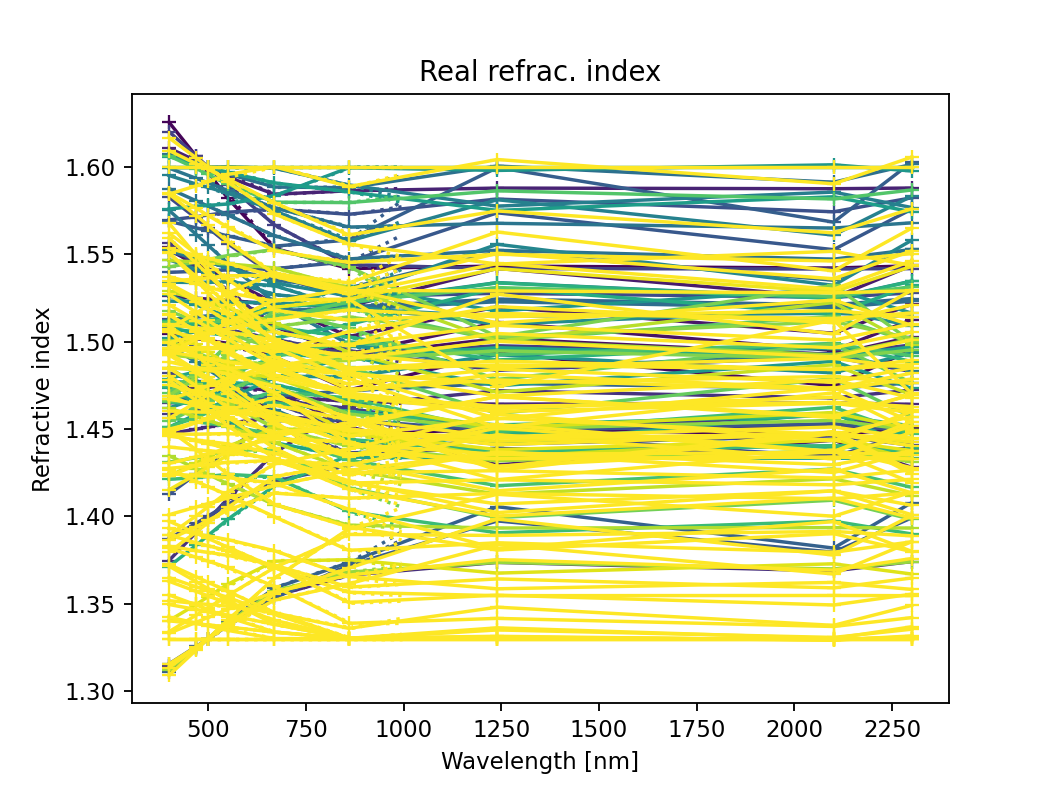

Text(0, 0.5, 'Refractive index')

In [33]:
fig,ax = plt.subplots(1,1)

for it,t in list(enumerate(ae[b'time'])):
    plt.plot(ae[b'wavelength'],ae[b'n_real'][it,:],':',c=plt.cm.viridis(it*3))
    plt.plot(wave_out,spline_wavelength_extend(ae[b'n_real'][it,:],ae[b'wavelength'],wave_out),
             '+-',c=plt.cm.viridis(it*3))
    
plt.title('Real refrac. index')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Refractive index')
    

<IPython.core.display.Javascript object>


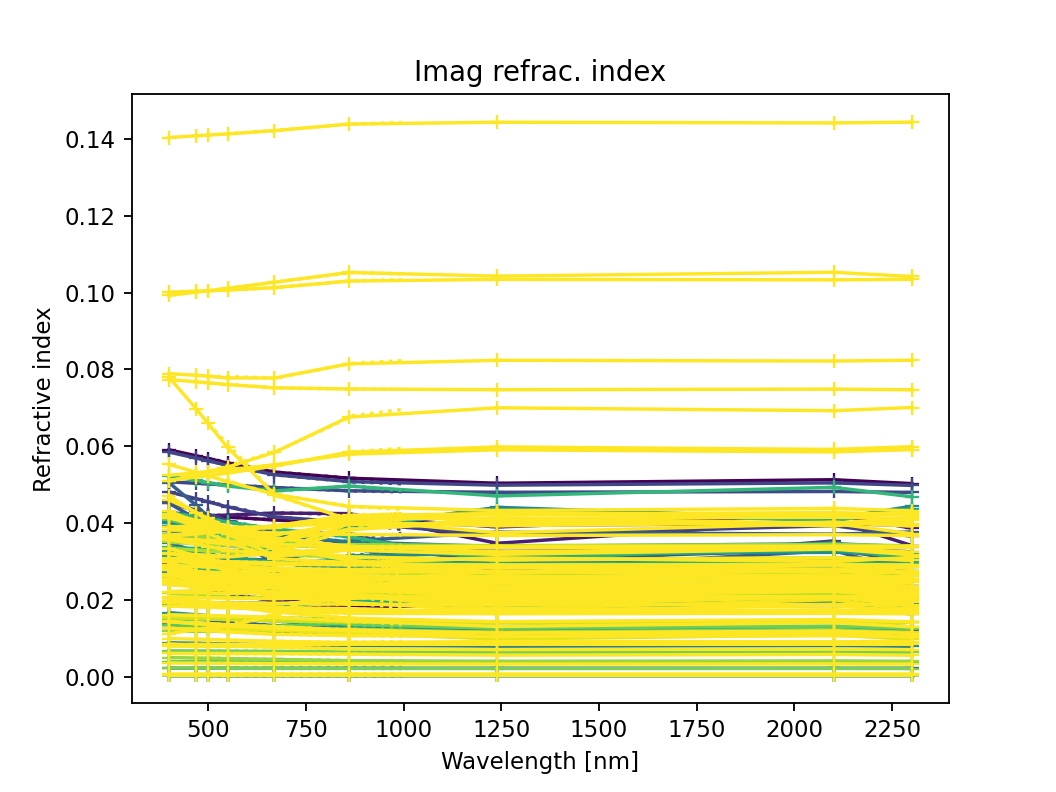

Text(0, 0.5, 'Refractive index')

In [34]:
plt.figure()
for it,t in list(enumerate(ae[b'time'])):
    plt.plot(ae[b'wavelength'],ae[b'n_imag'][it,:],':',c=plt.cm.viridis(it*3))
    plt.plot(wave_out,spline_wavelength_extend(ae[b'n_imag'][it,:],ae[b'wavelength'],wave_out),
         '+-',c=plt.cm.viridis(it*3))
    
plt.title('Imag refrac. index')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Refractive index')
    

In [35]:
def print_refrac_file(fname,wavelength,n_real,n_imag):
    #wavelength in nm, n_real and n_imag needs to be positive
    
    with open(fname,'w') as f:
        for iw,w in list(enumerate(wavelength)):
            f.write('{:4.3f} {:3.12f} {:3.12f}\n'.format(w,abs(n_real[iw]),abs(n_imag[iw])))

In [36]:
itest = 0
print_refrac_file(fp_rtm+'mie_tester.ref',wave_out,
                     spline_wavelength_extend(ae[b'n_real'][itest,:],ae[b'wavelength'],wave_out),
                     spline_wavelength_extend(ae[b'n_imag'][itest,:],ae[b'wavelength'],wave_out))

## Mie input file function

In [37]:
def mie_input(fname,refrac_file_name,size_dist_file_name,program='MIEV0',nmom=None):
    #simple mie input file program
     with open(fname,'w') as f:
            f.write('mie_program {}\n'.format(program))
            f.write('refrac file {}\n'.format(refrac_file_name))
            f.write('size_distribution_file {}\n'.format(size_dist_file_name))
            if nmom:
                f.write('nmom {}\n'.format(nmom))
            
    

In [38]:
mie_input(fp_rtm+'mie_tester.inp',fp_rtm+'mie_tester.ref',fp_rtm+'mie_tester.psd')

# Run through and make input files for scans

In [39]:
base = 'mie_ORACLES2016_4wvl_expansion_{}'.format(vv)
f_list = fp_rtm+base+'_list.sh'
with open(f_list,'w') as f:
    for it,tt in list(enumerate(ae[b'time'])):
        basename = base+'_{:03.0f}'.format(it)
        print_refrac_file(fp_rtm+basename+'.ref',wave_out,
                         spline_wavelength_extend(ae[b'n_real'][it,:],ae[b'wavelength'],wave_out),
                         spline_wavelength_extend(ae[b'n_imag'][it,:],ae[b'wavelength'],wave_out))
        print_size_dist_file(fp_rtm+basename+'.psd',ae[b'radius'],convert_dvlnr_to_dndr(ae[b'psd'][it,:],ae[b'radius']))
        mie_input(fp_rtm+basename+'.inp',fp_rtm+basename+'.ref',fp_rtm+basename+'.psd',nmom=1500)
        f.write('{bin_path}mie < {inp} > {out}\n'.format(bin_path=fp_bin,inp=fp_rtm+basename+'.inp',out=fp_rtm+basename+'.out'))

In [40]:
%ls $fp_rtm

mie_ORACLES2016_4wvl_expansion_v3_000.inp
mie_ORACLES2016_4wvl_expansion_v3_000.psd
mie_ORACLES2016_4wvl_expansion_v3_000.ref
mie_ORACLES2016_4wvl_expansion_v3_001.inp
mie_ORACLES2016_4wvl_expansion_v3_001.psd
mie_ORACLES2016_4wvl_expansion_v3_001.ref
mie_ORACLES2016_4wvl_expansion_v3_002.inp
mie_ORACLES2016_4wvl_expansion_v3_002.psd
mie_ORACLES2016_4wvl_expansion_v3_002.ref
mie_ORACLES2016_4wvl_expansion_v3_003.inp
mie_ORACLES2016_4wvl_expansion_v3_003.psd
mie_ORACLES2016_4wvl_expansion_v3_003.ref
mie_ORACLES2016_4wvl_expansion_v3_004.inp
mie_ORACLES2016_4wvl_expansion_v3_004.psd
mie_ORACLES2016_4wvl_expansion_v3_004.ref
mie_ORACLES2016_4wvl_expansion_v3_005.inp
mie_ORACLES2016_4wvl_expansion_v3_005.psd
mie_ORACLES2016_4wvl_expansion_v3_005.ref
mie_ORACLES2016_4wvl_expansion_v3_006.inp
mie_ORACLES2016_4wvl_expansion_v3_006.psd
mie_ORACLES2016_4wvl_expansion_v3_006.ref
mie_ORACLES2016_4wvl_expansion_v3_007.inp
mie_ORACLES2016_4wvl_expansion_v3_007.psd
mie_ORACLES2016_4wvl_expansion_v3_

In [41]:
!parallel --jobs=22 --bar < $f_list

0% 0:165=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLES ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_019.ref
0% 1:164=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLES ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_013.ref
1% 2:163=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLES ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_004.ref
1% 3:162=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLES ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_007.ref
2% 4:161=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLES ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_010.ref
3% 5:160=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLES ... read 9 data points from /scratch/rt

29% 48:117=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_047.ref
29% 49:116=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_048.ref
30% 50:115=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_049.ref
30% 51:114=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_051.ref
31% 52:113=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_052.ref
32% 53:112=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rt

32% 54:111=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_057.ref
33% 55:110=2s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_054.ref
33% 56:109=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_056.ref
34% 57:108=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_055.ref
35% 58:107=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_058.ref
35% 59:106=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rt

36% 61:104=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_061.ref
37% 62:103=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_062.ref
38% 63:102=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_063.ref
38% 64:101=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_064.ref
39% 65:100=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_065.ref
40% 66:99=1s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLE ... read 9 data points from /scratch/rt

68% 113:52=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_117.ref
69% 114:51=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_116.ref
69% 115:50=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_113.ref
70% 116:49=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_115.ref
70% 117:48=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_114.ref
71% 118:47=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACL ... read 9 data points from /scratch/rt

96% 159:6=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLE ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_155.ref
96% 160:5=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLE ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_163.ref
97% 161:4=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLE ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_162.ref
98% 162:3=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLE ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_159.ref
98% 163:2=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLE ... read 9 data points from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_161.ref
99% 164:1=0s /home/sam/libradtran/libRadtran-2.0.2/bin/mie < /scratch/rtm/ORACLE ... read 9 data points from /scratch/rt

## Read the mie output files

In [42]:
fname = fp_rtm+basename+'.out'

In [43]:
outs = np.genfromtxt(fname)

In [45]:
len(outs[0,7:])

1501

In [46]:
def read_mie_output(fname):
    # read the default ascii output file from mie code
    outs = np.genfromtxt(fname)
    d = {}
    d['wavelength'] = outs[:,0]
    d['n_real'] = outs[:,1]
    d['n_imag'] = outs[:,2]
    d['qext'] = outs[:,3]
    d['ssa'] = outs[:,4]
    d['asym'] = outs[:,5]
    d['spike'] = outs[:,6]
    d['pmom'] = outs[:,7:]
    return d

In [47]:
dats = []
for it,tt in list(enumerate(ae[b'time'])):
    basename = base+'_{:03.0f}'.format(it)
    dats.append(read_mie_output(fp_rtm+basename+'.out'))
    

In [48]:
dats[0]['pmom'].shape

(9, 1501)

## Plot out the ssa and asym extrapolations

In [49]:
fpt = '/data/sam/ORACLES/skyscan/Logan_20221118/'

<IPython.core.display.Javascript object>


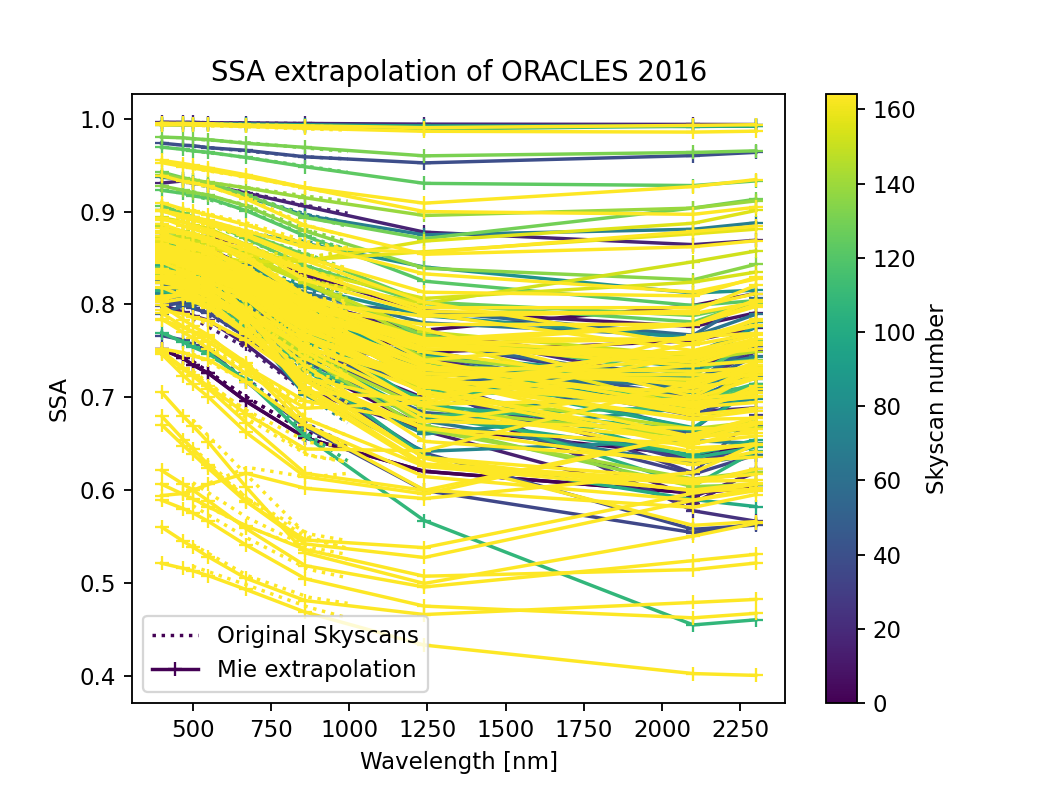

In [50]:
plt.figure()
it=0
plt.plot(ae[b'wavelength'],ae[b'SSA'][it,:],':',c=plt.cm.viridis(it*3),label='Original Skyscans')
plt.plot(wave_out,dats[it]['ssa'],'+-',c=plt.cm.viridis(it*3),label='Mie extrapolation')
for it,t in list(enumerate(ae[b'time'])):
    plt.plot(ae[b'wavelength'],ae[b'SSA'][it,:],':',c=plt.cm.viridis(it*3))
    plt.plot(wave_out,dats[it]['ssa'],'+-',c=plt.cm.viridis(it*3))
plt.legend()
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=plt.Normalize(vmin=0,vmax=it))
plt.colorbar(sm,label='Skyscan number')
plt.title('SSA extrapolation of ORACLES 2016')
plt.xlabel('Wavelength [nm]')
plt.ylabel('SSA')
plt.savefig(fpt+'SSA_mie_extrapolation_ORACLES2016_{}.png'.format(vv),dpi=600,transparent=True)

<IPython.core.display.Javascript object>


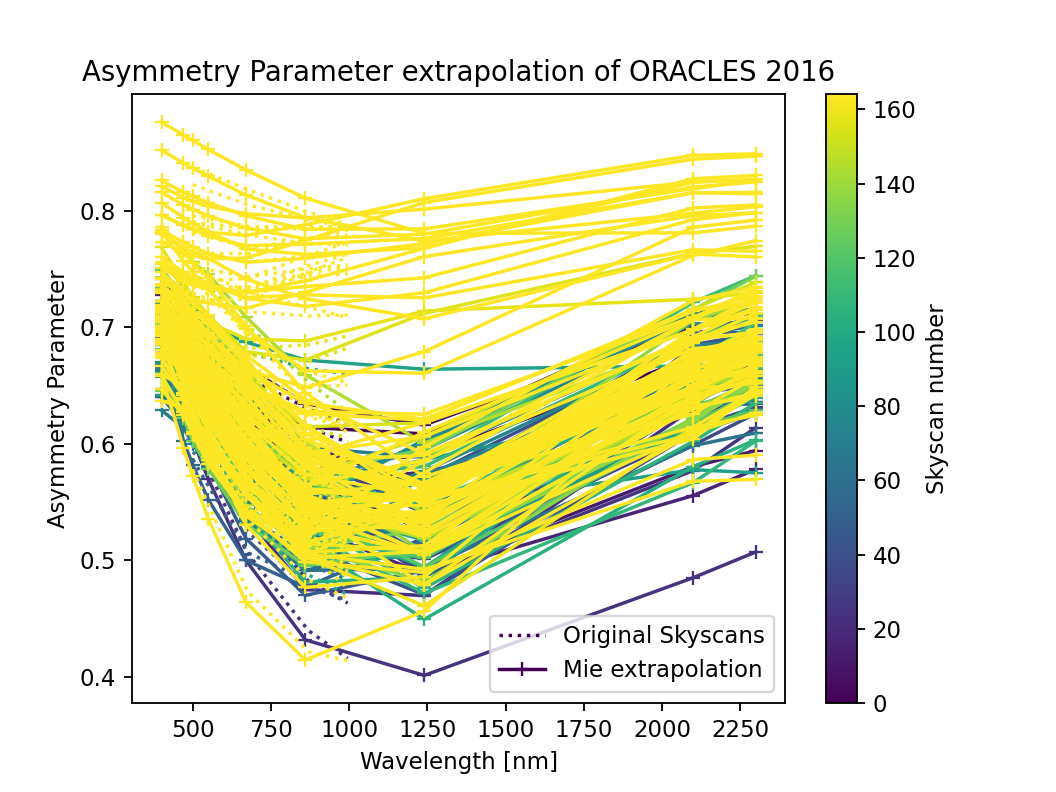

In [51]:
plt.figure()
it=0
plt.plot(ae[b'wavelength'],ae[b'g_total'][it,:],':',c=plt.cm.viridis(it*3),label='Original Skyscans')
plt.plot(wave_out,dats[it]['asym'],'+-',c=plt.cm.viridis(it*3),label='Mie extrapolation')
for it,t in list(enumerate(ae[b'time'])):
    plt.plot(ae[b'wavelength'],ae[b'g_total'][it,:],':',c=plt.cm.viridis(it*3))
    plt.plot(wave_out,dats[it]['asym'],'+-',c=plt.cm.viridis(it*3))
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis,norm=plt.Normalize(vmin=0,vmax=it))
plt.colorbar(sm,label='Skyscan number')
plt.title('Asymmetry Parameter extrapolation of ORACLES 2016')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Asymmetry Parameter')
plt.legend()
    
plt.savefig(fpt+'ASYM_mie_extrapolation_ORACLES2016_{}.png'.format(vv),dpi=600,transparent=True)

## Save as netcdf

### Copy file data and attributes from older one

In [52]:
fpt = '/data/sam/ORACLES/skyscan/Logan_20221118/'
f_out = fpt + '4STAR-aeroinv4wvlexpansion_P3_2016_R1.nc'

In [53]:
f_out

'/data/sam/ORACLES/skyscan/Logan_20221118/4STAR-aeroinv4wvlexpansion_P3_2016_R1.nc'

In [54]:
f_in = fp + 'data_processed/starskies/skyscans_Logan_20221116/' +  '4STAR-aeroinv4wvl_P3_2016_R0.nc'

In [55]:
toexclude = ['ExcludeVar1', 'ExcludeVar2']

with nc.Dataset(f_in) as src, nc.Dataset(f_out, "w") as dst:
    # copy global attributes all at once via dictionary
    dst.setncatts(src.__dict__)
    # copy dimensions
    for name, dimension in src.dimensions.items():
        dst.createDimension(
            name, (len(dimension) if not dimension.isunlimited() else None))
    # copy all file data except for the excluded
    for name, variable in src.variables.items():
        if name not in toexclude:
            x = dst.createVariable(name, variable.datatype, variable.dimensions)
            # copy variable attributes all at once via dictionary
            dst[name].setncatts(src[name].__dict__)
            dst[name][:] = src[name][:]
            

### Update the Dataset with the new calculated ssa/asym

In [78]:
fn = nc.Dataset(f_out,'a')

In [79]:
fn

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    PI: Jens Redemann
    Institution: NASA Ames Research Center
    Instrument: Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)
    Mission: ORACLES 2016
    PI_CONTACT_INFO: jredemann@ou.edu
    PLATFORM: NASA P3
    LOCATION: Based at Walvis Bay, Namibia, aircraft latitude, longitude, altitude are included in the data records
    DATA_INFO: Measurements represent airborne retrievals of aerosol properties derived from direct beam and angularly-resolved sky radiances at the location of the aircraft in the direction indicated by Az_sky and El_sky.  All measurements used in a single retrieval are reported at the time averaged over the sky scan.
    RETRIEVAL_INFO: Retrieval code was provided by AERONET (version 2 Aerosol Inversions), input files modified for airborne application.
    RETRIEVAL_DESCRIPTION: https://aeronet.gsfc.nasa.gov/new_web/Documents/Inversion_products_V2.p

In [87]:
fn.getncattr('REVISION')

'R1'

In [59]:
fn.setncattr('REVISION',"R1")
fn.setncattr('R1',"Same measurement values as R0 4wvl skyscan results from Logan Mitchell. Updated by Samuel LeBlanc to include phase function moments of extrapolated values, and expanded wavelengths. ")
fn.setncattr('History',"Modified By Samuel LeBlanc, 2022-11-18: to add wavelength-extrapolated SSA and Asymmetry Parameter, pahser function using Mie calculations of size distribution and extrapolated index of refraction")


In [60]:
fn.createDimension('Extrap_wavelength',len(dats[0]['wavelength']))
fn.createVariable('Extrap_wavelength','float64',('Extrap_wavelength'))
fn['Extrap_wavelength'].setncatts({'long_name':'Wavelengths from the extrapolated mie calculations','units':'nm'})
fn['Extrap_wavelength'][:] = dats[0]['wavelength'][:]

In [61]:
extraps = {}


extraps['n_real'] = {'data':np.array([da['n_real'] for da in dats]),
                     'atts':{'long_name':'Real refractive index, extrapolated in wavelength by Mie calculations',
                             'units':'None',
                             'history':'Built by Samuel LeBlanc on 2022-11-18'}}
extraps['n_imag'] = {'data':np.array([da['n_imag'] for da in dats]),
                     'atts':{'long_name':'Imaginary refractive index, extrapolated in wavelength by Mie calculations',
                             'units':'None',
                             'history':'Built by Samuel LeBlanc on 2022-11-18'}}
extraps['qext'] = {'data':np.array([da['qext'] for da in dats]),
                     'atts':{'long_name':'extinction efficiency factor, extrapolated in wavelength by Mie calculations',
                             'units':'cm^3/m^3',
                             'history':'Built by Samuel LeBlanc on 2022-11-18'}}
extraps['ssa'] = {'data':np.array([da['ssa'] for da in dats]),
                     'atts':{'long_name':'Single Scattering Albedo, extrapolated in wavelength by Mie calculations',
                             'units':'None',
                             'history':'Built by Samuel LeBlanc on 2022-11-18'}}
extraps['asym'] = {'data':np.array([da['asym'] for da in dats]),
                     'atts':{'long_name':'Asymmetry Parameter, extrapolated in wavelength by Mie calculations',
                             'units':'None',
                             'history':'Built by Samuel LeBlanc on 2022-11-18'}}
extraps['pmom'] = {'data':np.array([da['pmom'] for da in dats]),
                     'atts':{'long_name':'Phase function Legendre moments (km) for the phase function(p(µ)) reconstruction using: p(µ) = Sum((2m + 1) · km · Pm(µ)) for m=0 to infinity',
                             'units':'None',
                             'history':'Built by Samuel LeBlanc on 2022-11-18'}}


In [62]:
len(dats[0]['pmom'][0,:])

1501

In [63]:
fn.createDimension('Extrap_nmom',len(dats[0]['pmom'][0,:]))
fn.createVariable('Extrap_nmom','int',('Extrap_nmom'))
fn['Extrap_nmom'].setncatts({'long_name':'Moment number for phase function moments','units':'None'})
fn['Extrap_nmom'][:] = np.arange(0,len(dats[0]['pmom'][0,:]))

In [64]:
for k in extraps:
    if k == 'pmom':
        fn.createVariable('Extrap_'+k,'float',('time','Extrap_wavelength','Extrap_nmom'))
        fn['Extrap_'+k].setncatts(extraps[k]['atts'])
        fn['Extrap_'+k][:] = extraps[k]['data']
    else:
        fn.createVariable('Extrap_'+k,'float64',('time','Extrap_wavelength'))
        fn['Extrap_'+k].setncatts(extraps[k]['atts'])
        fn['Extrap_'+k][:] = extraps[k]['data']

In [199]:
if vv=='v3':
    k = 'QC_flags'
    extraps = {}
    extraps['QC_flags'] = {'data':qc_flags,
                     'atts':{'long_name':'QC of flags, lower is better. From Pistone et al., published on QC values below 1. evaluated on AOD_400>0.2, max scattering angle measured larger than 90, and low mean sky error (below~5)',
                             'units':'None',
                             'history':'Built by Pistone et al., and incorporated into file on 2022-10-04'}}

    fn.createVariable('QC_flags','float',('time'))
    fn['QC_flags'].setncatts(extraps[k]['atts'])
    fn['QC_flags'][:] = extraps[k]['data']

In [65]:
fn

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    PI: Jens Redemann
    Institution: NASA Ames Research Center
    Instrument: Spectrometers for Sky-Scanning, Sun-Tracking Atmospheric Research (4STAR)
    Mission: ORACLES 2016
    PI_CONTACT_INFO: jredemann@ou.edu
    PLATFORM: NASA P3
    LOCATION: Based at Walvis Bay, Namibia, aircraft latitude, longitude, altitude are included in the data records
    DATA_INFO: Measurements represent airborne retrievals of aerosol properties derived from direct beam and angularly-resolved sky radiances at the location of the aircraft in the direction indicated by Az_sky and El_sky.  All measurements used in a single retrieval are reported at the time averaged over the sky scan.
    RETRIEVAL_INFO: Retrieval code was provided by AERONET (version 2 Aerosol Inversions), input files modified for airborne application.
    RETRIEVAL_DESCRIPTION: https://aeronet.gsfc.nasa.gov/new_web/Documents/Inversion_products_V2.p

In [93]:
fn['Lat'].setncatts({'long_name':'Latitude'})

In [94]:
fn.close()

# Calculate the phase functions

In [67]:
import subprocess

In [68]:
base = 'mie_ORACLES2016_4wvl_expansion_{}'.format(vv)
f_list = fp_rtm+base+'_list_for_phase.sh'
with open(f_list,'w') as f:
    for it,tt in list(enumerate(ae[b'time'])):
        basename = base+'_{:03.0f}'.format(it)
        # loop through and copy file to delete first line
        for i,w in list(enumerate(wave_out)):
            if i==0:
                subprocess.call("sed '/^$/d' "+fp_rtm+basename+".out > "+fp_rtm+basename+"_w{:1.0f}.out".format(i),shell=True) # remove empty lines
            else:
                subprocess.call("sed '1d' "+fp_rtm+basename+"_w{:1.0f}.out > ".format(i-1)+fp_rtm+basename+"_w{:1.0f}.out".format(i),shell=True)
            f.write('{bin_path}phase {inp} > {out}\n'.format(bin_path=fp_bin,inp=fp_rtm+basename+'_w{:1.0f}.out'.format(i),out=fp_rtm+basename+'_phase_w{:1.0f}.out'.format(i)))

In [69]:
wave_out

array([ 400.,  470.,  500.,  550.,  670.,  860., 1240., 2100., 2300.])

In [70]:
!parallel --jobs=22 --bar < $f_list

0% 0:1485=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACLE ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_000_w0.out
 ... processing only 1st line!
0% 1:1484=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACLE ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_000_w1.out
 ... processing only 1st line!
0% 2:1483=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACLE ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_000_w2.out
 ... processing only 1st line!
0% 3:1482=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACLE ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_000_w3.out
 ... processing only 1st line!
0% 4:1481=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rt

2% 40:1445=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_004_w4.out
 ... processing only 1st line!
2% 41:1444=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_004_w5.out
 ... processing only 1st line!
2% 42:1443=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_004_w6.out
 ... processing only 1st line!
2% 43:1442=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_004_w7.out
 ... processing only 1st line!
2% 44:1441=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/r

5% 77:1408=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_008_w5.out
 ... processing only 1st line!
5% 78:1407=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_008_w6.out
 ... processing only 1st line!
5% 79:1406=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_008_w7.out
 ... processing only 1st line!
5% 80:1405=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_008_w8.out
5% 81:1404=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORACL ... read 9 lines with 

7% 113:1372=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_012_w5.out
 ... processing only 1st line!
7% 114:1371=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_012_w6.out
 ... processing only 1st line!
7% 115:1370=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_012_w7.out
 ... processing only 1st line!
7% 116:1369=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_012_w8.out
7% 117:1368=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 9 lines with 

10% 163:1322=8s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_018_w1.out
 ... processing only 1st line!
11% 164:1321=8s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_018_w2.out
 ... processing only 1st line!
11% 165:1320=8s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_018_w3.out
 ... processing only 1st line!
11% 166:1319=8s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_018_w4.out
 ... processing only 1st line!
11% 167:1318=8s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

13% 200:1285=6s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_022_w2.out
 ... processing only 1st line!
13% 201:1284=6s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_022_w3.out
 ... processing only 1st line!
13% 202:1283=6s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_022_w4.out
 ... processing only 1st line!
13% 203:1282=6s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_022_w5.out
 ... processing only 1st line!
13% 204:1281=6s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

16% 238:1247=5s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_026_w4.out
 ... processing only 1st line!
16% 239:1246=5s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_026_w5.out
 ... processing only 1st line!
16% 240:1245=5s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_026_w6.out
 ... processing only 1st line!
16% 241:1244=5s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_026_w7.out
 ... processing only 1st line!
16% 242:1243=5s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

18% 275:1210=4s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_030_w5.out
 ... processing only 1st line!
18% 276:1209=4s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_030_w6.out
 ... processing only 1st line!
18% 277:1208=4s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_030_w7.out
 ... processing only 1st line!
18% 278:1207=4s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_030_w8.out
18% 279:1206=4s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 

24% 360:1125=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_040_w0.out
 ... processing only 1st line!
24% 361:1124=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_040_w1.out
 ... processing only 1st line!
24% 362:1123=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_040_w2.out
 ... processing only 1st line!
24% 363:1122=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_040_w3.out
 ... processing only 1st line!
24% 364:1121=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

26% 398:1087=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_044_w2.out
 ... processing only 1st line!
26% 399:1086=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_044_w3.out
 ... processing only 1st line!
26% 400:1085=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_044_w4.out
 ... processing only 1st line!
27% 401:1084=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_044_w5.out
 ... processing only 1st line!
27% 402:1083=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

29% 436:1049=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_048_w4.out
 ... processing only 1st line!
29% 437:1048=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_048_w5.out
 ... processing only 1st line!
29% 438:1047=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_048_w6.out
 ... processing only 1st line!
29% 439:1046=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_048_w7.out
 ... processing only 1st line!
29% 440:1045=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

31% 473:1012=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_052_w5.out
 ... processing only 1st line!
31% 474:1011=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_052_w6.out
 ... processing only 1st line!
31% 475:1010=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_052_w7.out
 ... processing only 1st line!
32% 476:1009=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_052_w8.out
32% 477:1008=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 

35% 522:963=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_058_w0.out
 ... processing only 1st line!
35% 523:962=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_058_w1.out
 ... processing only 1st line!
35% 524:961=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_058_w2.out
 ... processing only 1st line!
35% 525:960=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_058_w3.out
 ... processing only 1st line!
35% 526:959=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/

38% 572:913=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_063_w5.out
 ... processing only 1st line!
38% 573:912=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_063_w6.out
 ... processing only 1st line!
38% 574:911=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_063_w7.out
 ... processing only 1st line!
38% 575:910=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_063_w8.out
38% 576:909=3s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 9 lines with 

40% 608:877=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_067_w5.out
 ... processing only 1st line!
41% 609:876=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_067_w6.out
 ... processing only 1st line!
41% 610:875=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_067_w7.out
 ... processing only 1st line!
41% 611:874=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_067_w8.out
41% 612:873=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 9 lines with 

43% 643:842=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_071_w4.out
 ... processing only 1st line!
43% 644:841=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_071_w5.out
 ... processing only 1st line!
43% 645:840=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_071_w6.out
 ... processing only 1st line!
43% 646:839=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_071_w7.out
 ... processing only 1st line!
43% 647:838=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/

48% 726:759=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_080_w6.out
 ... processing only 1st line!
48% 727:758=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_080_w7.out
 ... processing only 1st line!
49% 728:757=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_080_w8.out
49% 729:756=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_081_w0.out
 ... processing only 1st line!
49% 730:755=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 8 lines with 

52% 776:709=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_086_w2.out
 ... processing only 1st line!
52% 777:708=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_086_w3.out
 ... processing only 1st line!
52% 778:707=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_086_w4.out
 ... processing only 1st line!
52% 779:706=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_086_w5.out
 ... processing only 1st line!
52% 780:705=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/

55% 825:660=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_091_w6.out
 ... processing only 1st line!
55% 826:659=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_091_w7.out
 ... processing only 1st line!
55% 827:658=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_091_w8.out
55% 828:657=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_092_w0.out
 ... processing only 1st line!
55% 829:656=2s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 8 lines with 

61% 910:575=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_101_w1.out
 ... processing only 1st line!
61% 911:574=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_101_w2.out
 ... processing only 1st line!
61% 912:573=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_101_w3.out
 ... processing only 1st line!
61% 913:572=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_101_w4.out
 ... processing only 1st line!
61% 914:571=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/

63% 947:538=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_105_w2.out
 ... processing only 1st line!
63% 948:537=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_105_w3.out
 ... processing only 1st line!
63% 949:536=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_105_w4.out
 ... processing only 1st line!
63% 950:535=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_105_w5.out
 ... processing only 1st line!
64% 951:534=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/

67% 998:487=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_110_w8.out
67% 999:486=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_111_w0.out
 ... processing only 1st line!
67% 1000:485=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_111_w1.out
 ... processing only 1st line!
67% 1001:484=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_111_w2.out
 ... processing only 1st line!
67% 1002:483=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 

70% 1049:436=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_116_w5.out
 ... processing only 1st line!
70% 1050:435=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_116_w6.out
 ... processing only 1st line!
70% 1051:434=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_116_w7.out
 ... processing only 1st line!
70% 1052:433=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_116_w8.out
70% 1053:432=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 

74% 1100:385=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_122_w2.out
 ... processing only 1st line!
74% 1101:384=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_122_w3.out
 ... processing only 1st line!
74% 1102:383=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_122_w4.out
 ... processing only 1st line!
74% 1103:382=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_122_w5.out
 ... processing only 1st line!
74% 1104:381=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

77% 1150:335=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_127_w7.out
 ... processing only 1st line!
77% 1151:334=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_127_w8.out
77% 1152:333=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_128_w0.out
 ... processing only 1st line!
77% 1153:332=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_128_w1.out
 ... processing only 1st line!
77% 1154:331=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 

79% 1187:298=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_131_w8.out
80% 1188:297=1s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_132_w0.out
 ... processing only 1st line!
80% 1189:296=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_132_w1.out
 ... processing only 1st line!
80% 1190:295=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_132_w2.out
 ... processing only 1st line!
80% 1191:294=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 

83% 1238:247=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_137_w5.out
 ... processing only 1st line!
83% 1239:246=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_137_w6.out
 ... processing only 1st line!
83% 1240:245=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_137_w7.out
 ... processing only 1st line!
83% 1241:244=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_137_w8.out
83% 1242:243=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 

86% 1289:196=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_143_w2.out
 ... processing only 1st line!
86% 1290:195=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_143_w3.out
 ... processing only 1st line!
86% 1291:194=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_143_w4.out
 ... processing only 1st line!
87% 1292:193=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_143_w5.out
 ... processing only 1st line!
87% 1293:192=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

89% 1324:161=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 8 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_147_w1.out
 ... processing only 1st line!
89% 1325:160=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_147_w2.out
 ... processing only 1st line!
89% 1326:159=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_147_w3.out
 ... processing only 1st line!
89% 1327:158=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_147_w4.out
 ... processing only 1st line!
89% 1328:157=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch

92% 1374:111=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_152_w6.out
 ... processing only 1st line!
92% 1375:110=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 2 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_152_w7.out
 ... processing only 1st line!
92% 1376:109=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 1 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_152_w8.out
92% 1377:108=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 9 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_153_w0.out
 ... processing only 1st line!
92% 1378:107=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORA ... read 8 lines with 

95% 1425:60=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_158_w3.out
 ... processing only 1st line!
96% 1426:59=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_158_w4.out
 ... processing only 1st line!
96% 1427:58=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_158_w5.out
 ... processing only 1st line!
96% 1428:57=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 3 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_158_w6.out
 ... processing only 1st line!
96% 1429:56=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/

98% 1460:25=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 7 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_162_w2.out
 ... processing only 1st line!
98% 1461:24=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 6 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_162_w3.out
 ... processing only 1st line!
98% 1462:23=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 5 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_162_w4.out
 ... processing only 1st line!
98% 1463:22=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/rtm/ORAC ... read 4 lines with 1501 coefficients each from /scratch/rtm/ORACLES_mie/mie_ORACLES2016_4wvl_expansion_v3_162_w5.out
 ... processing only 1st line!
98% 1464:21=0s /home/sam/libradtran/libRadtran-2.0.2/bin/phase /scratch/

## Read the output phase function files

In [71]:
ph1 = np.genfromtxt(fp_rtm+basename+'_phase_w{:1.0f}.out'.format(i))

In [72]:
phase = np.zeros((len(ae[b'time']),len(wave_out),len(ph1[:,0])))+np.nan
iphase = np.zeros((len(ae[b'time']),len(wave_out),len(ph1[:,0])))+np.nan
mu = ph1[:,0]
scat_angle = np.arccos(mu)*180.0/np.pi

In [73]:
base = 'mie_ORACLES2016_4wvl_expansion_{}'.format(vv)
for it,tt in list(enumerate(ae[b'time'])):
    basename = base+'_{:03.0f}'.format(it)
    for i,w in list(enumerate(wave_out)):
        ph = np.genfromtxt(fp_rtm+basename+'_phase_w{:1.0f}.out'.format(i))
        phase[it,i,:] = ph[:,1]
        iphase[it,i,:] = ph[:,2]

In [74]:
phase.shape

(165, 9, 201)

In [75]:
from mpltools import color

<IPython.core.display.Javascript object>


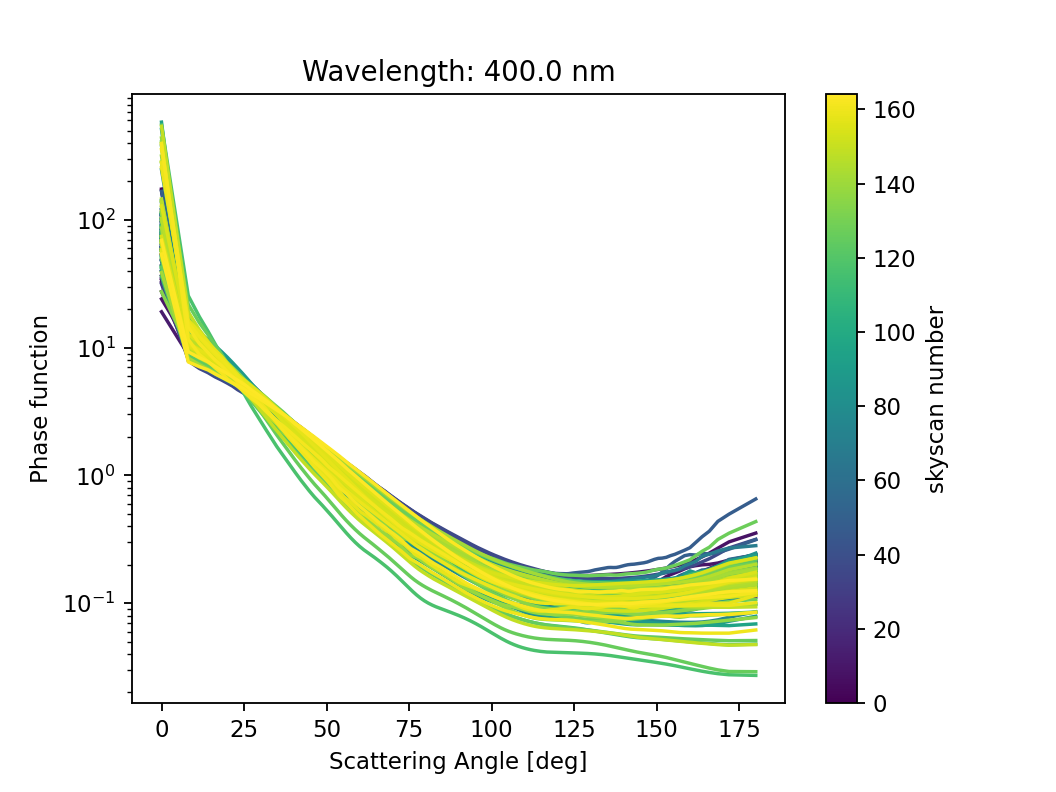

<IPython.core.display.Javascript object>


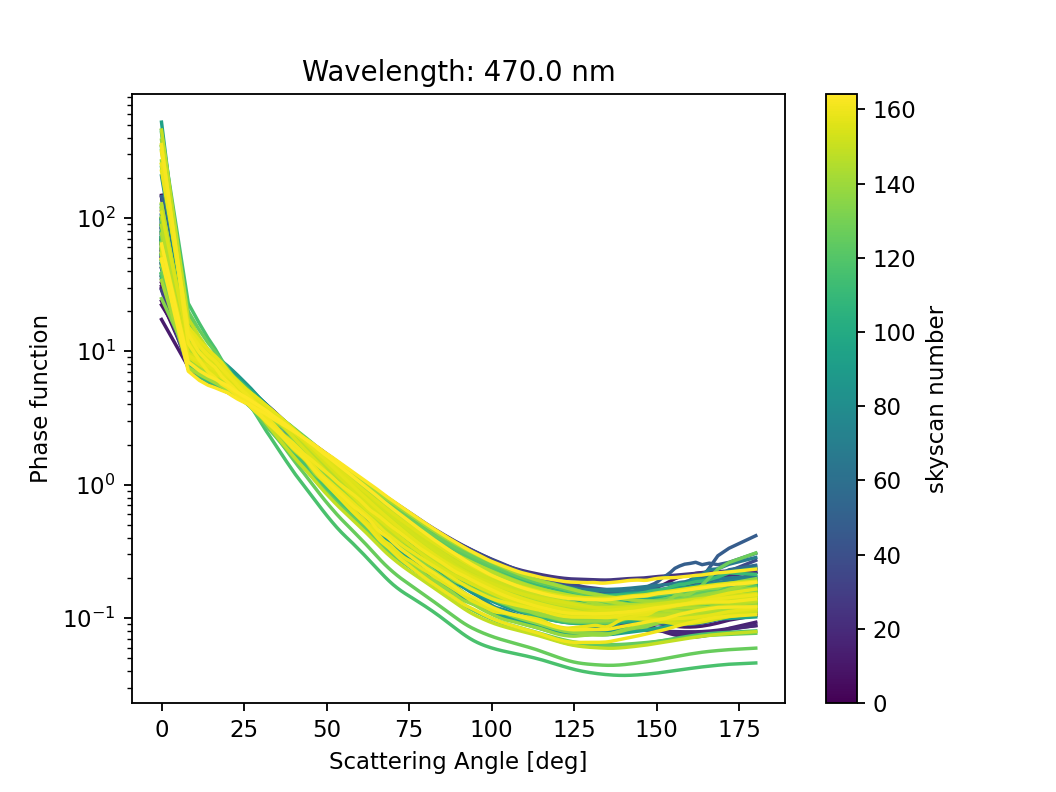

<IPython.core.display.Javascript object>


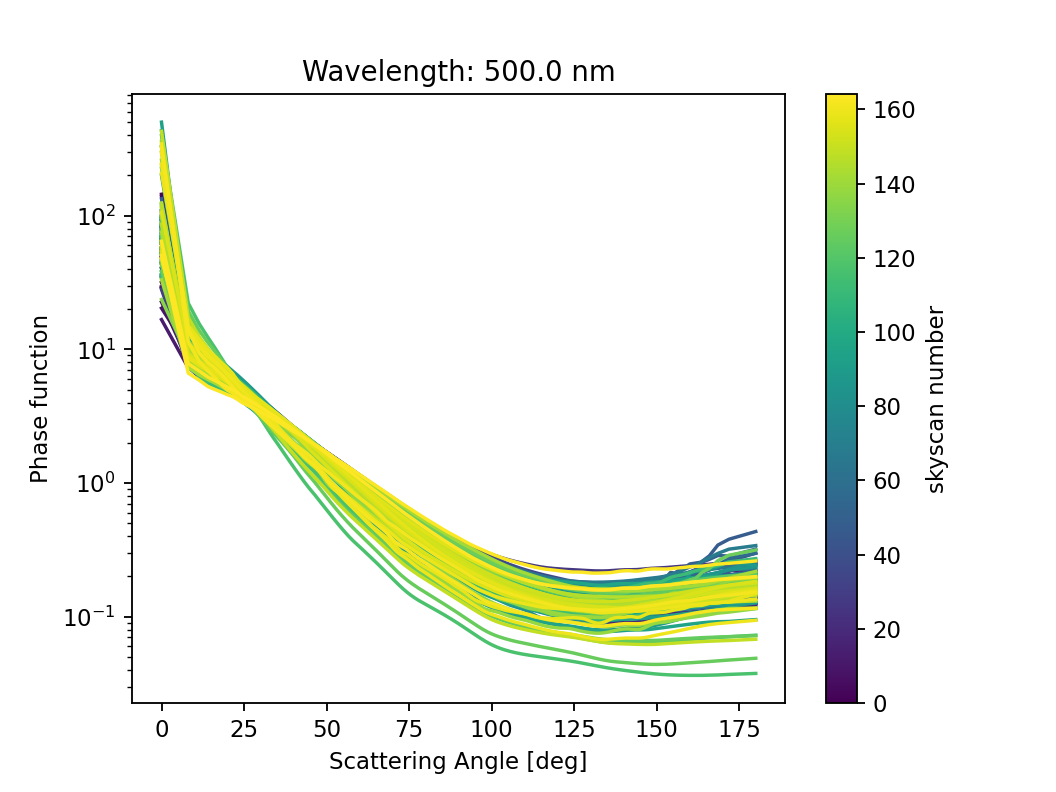

<IPython.core.display.Javascript object>


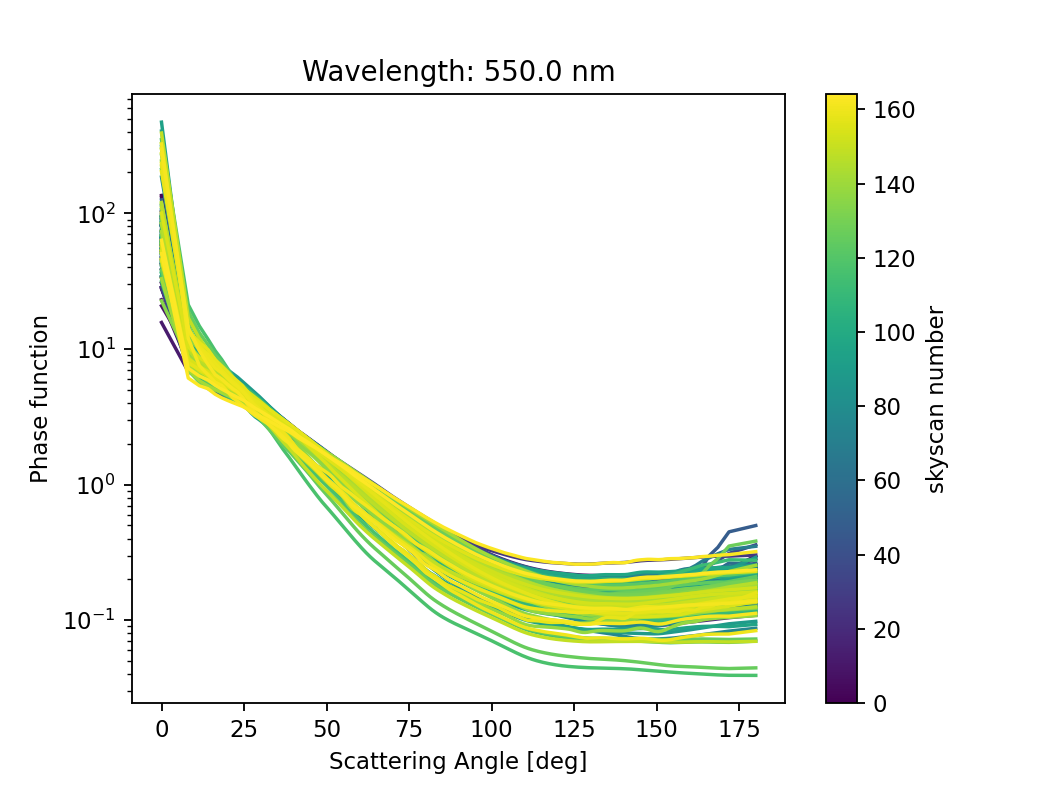

<IPython.core.display.Javascript object>


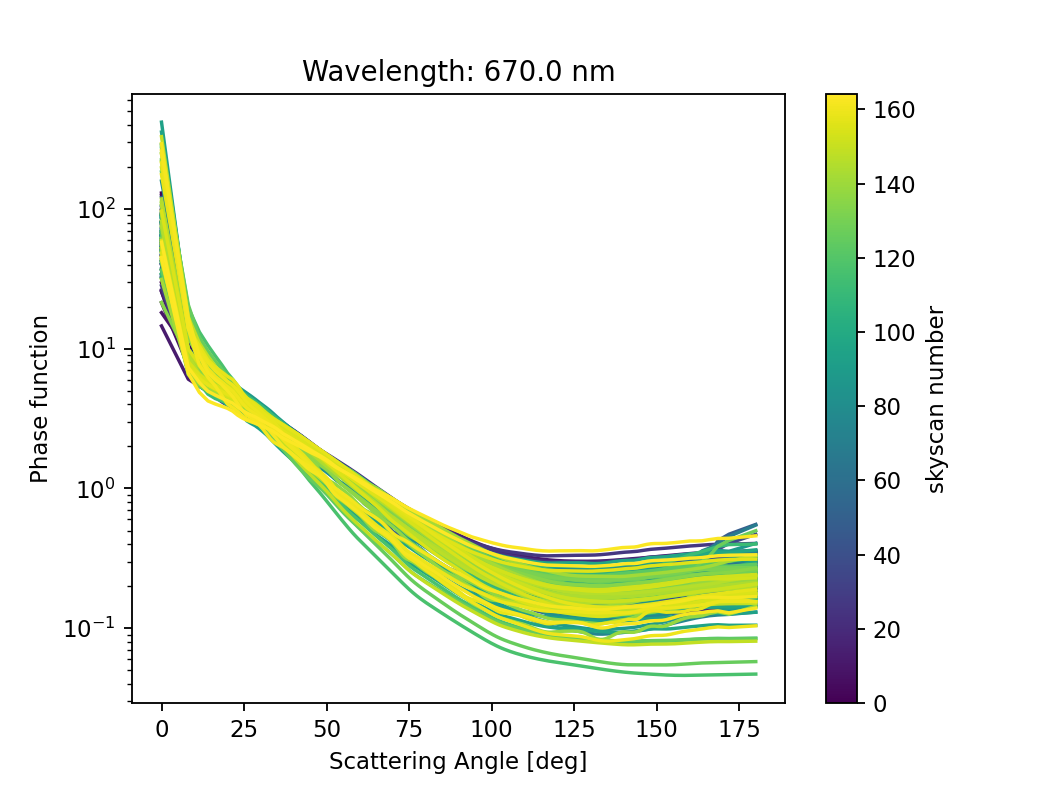

<IPython.core.display.Javascript object>


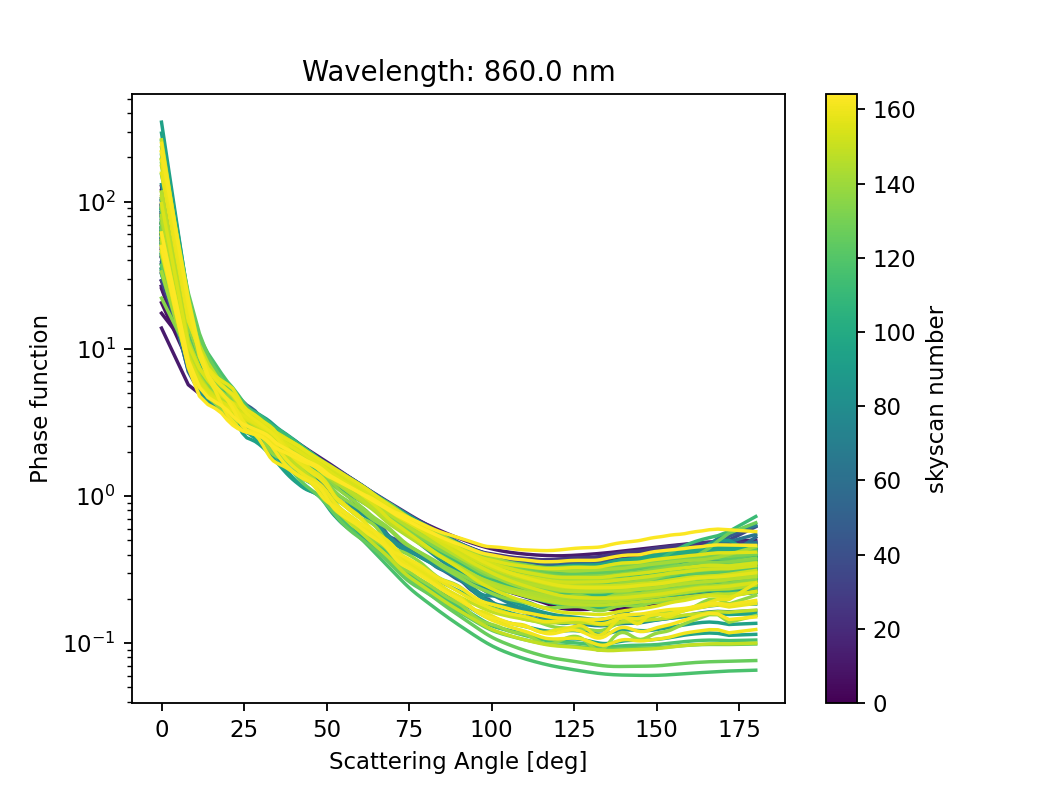

<IPython.core.display.Javascript object>


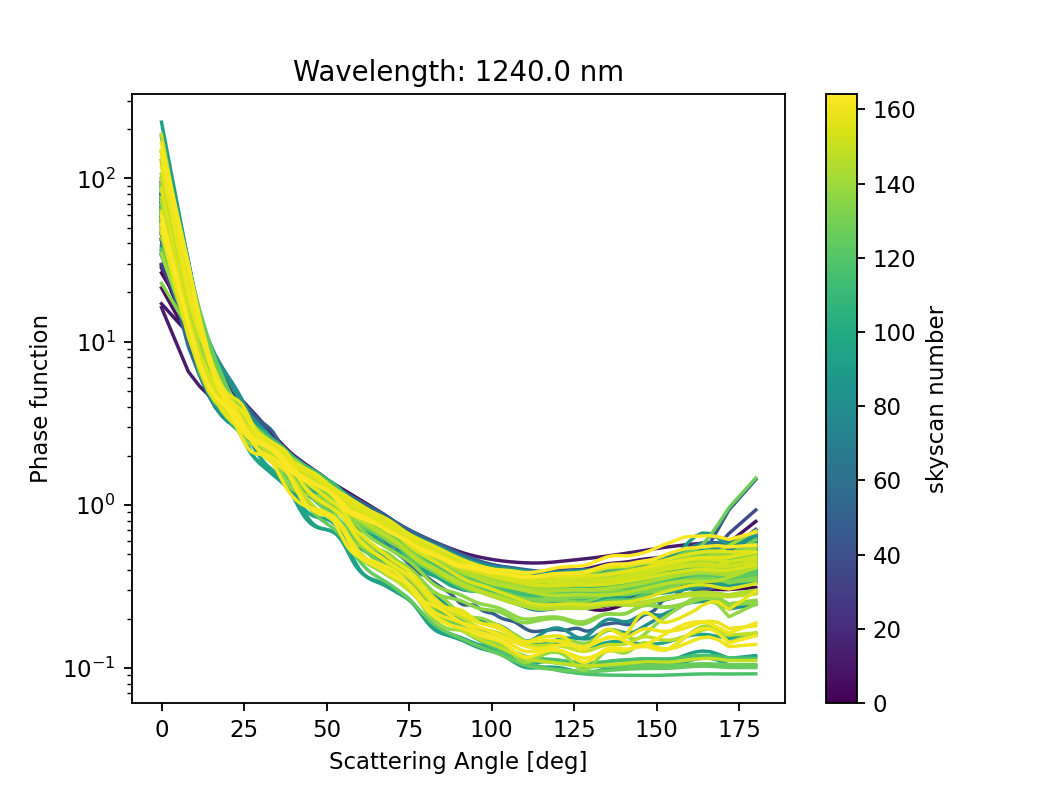

<IPython.core.display.Javascript object>


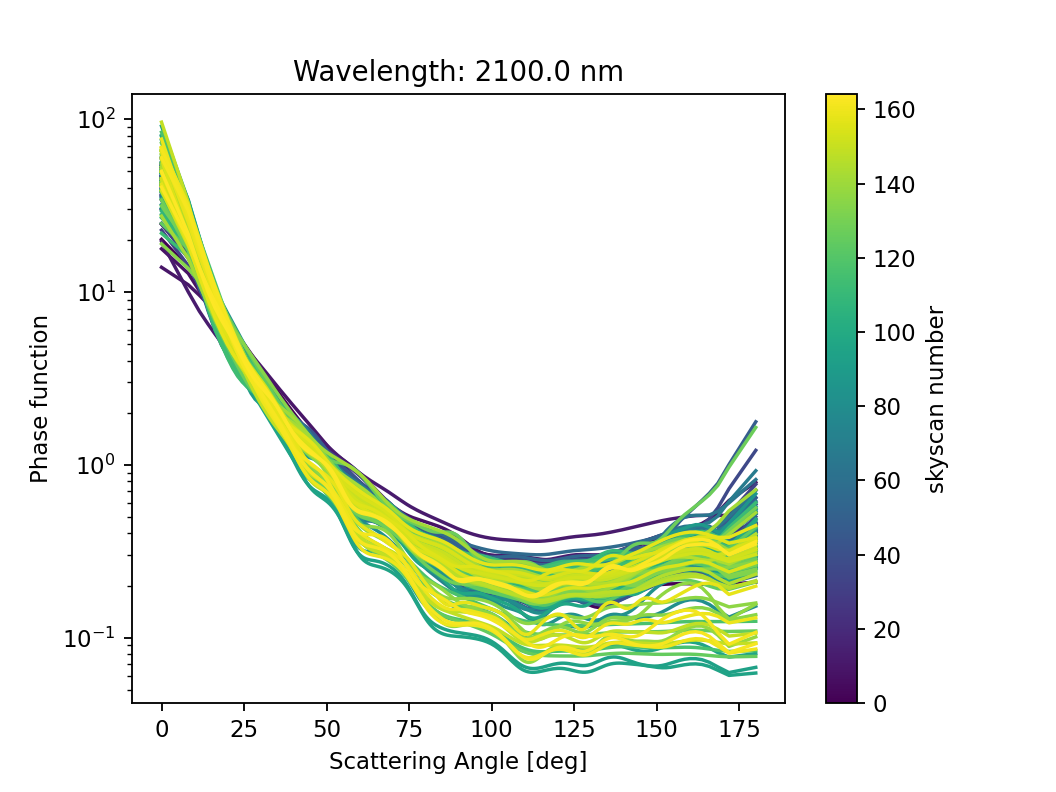

<IPython.core.display.Javascript object>


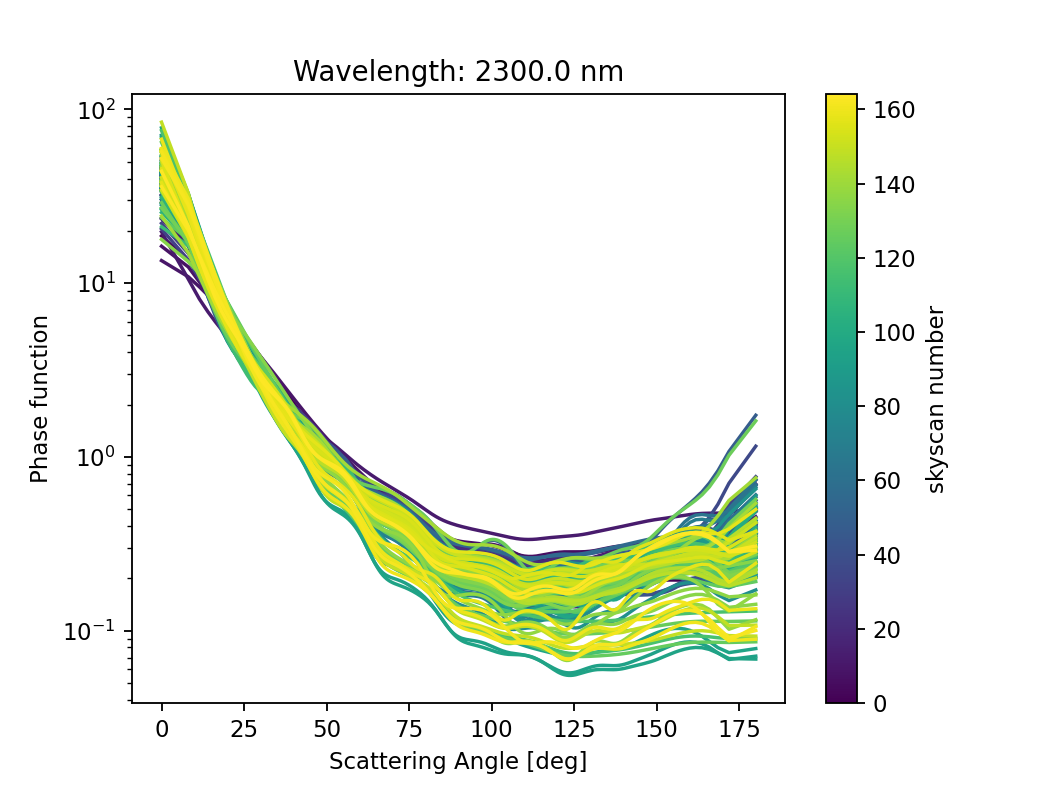

In [76]:
for i,w in list(enumerate(wave_out)):
    plt.figure()
    color.cycle_cmap(len(ae[b'time']),cmap=plt.cm.viridis,ax=plt.gca())
    plt.plot(scat_angle,phase[:,i,:].T)
    plt.xlabel('Scattering Angle [deg]')
    plt.ylabel('Phase function')
    plt.yscale('log')
    plt.title('Wavelength: {:4.1f} nm'.format(w))

    scalarmap = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
    scalarmap.set_array(range(len(ae[b'time'])))
    cba = plt.colorbar(scalarmap,label='skyscan number')


# Load the calculated reflectances with/withaero for presentation

In [6]:
import Run_libradtran as rl

In [10]:
fo = '/scratch/rtm/input/TASNPP_v1/'
zout=[0.2,1.5,100.0]

In [14]:
aw0 = rl.read_libradtran(fo+'ORACLES_cloud_refl_w0.out',zout=zout)
aw1 = rl.read_libradtran(fo+'ORACLES_cloud_refl_w1.out',zout=zout)
nw0 = rl.read_libradtran(fo+'ORACLES_cloud_refl_w0_noaero.out',zout=zout)
nw1 = rl.read_libradtran(fo+'ORACLES_cloud_refl_w1_noaero.out',zout=zout)

In [17]:
aw0.keys()

dict_keys(['wvl', 'zout', 'direct_down', 'diffuse_down', 'diffuse_up', 'int_dir_dn', 'int_dif_dn', 'int_dif_up'])

In [18]:
aw0['direct_down'].shape

(641, 3)

In [20]:
refl_a = np.hstack(aw0['direct_down'],aw1['direct_down'])
#refl_n = 

TypeError: _vhstack_dispatcher() takes 1 positional argument but 2 were given

In [26]:
refl_a = np.vstack([aw0['diffuse_up'],aw1['diffuse_up']])/(np.vstack([aw0['direct_down'],aw1['direct_down']])+np.vstack([aw0['diffuse_down'],aw1['diffuse_down']]))
refl_n = np.vstack([nw0['diffuse_up'],nw1['diffuse_up']])/(np.vstack([nw0['direct_down'],nw1['direct_down']])+np.vstack([nw0['diffuse_down'],nw1['diffuse_down']]))
wvls = np.hstack([aw0['wvl'], aw1['wvl']])

<ipython-input-26-db0026f2a76a>:1: RuntimeWarning: invalid value encountered in true_divide
  refl_a = np.vstack([aw0['diffuse_up'],aw1['diffuse_up']])/(np.vstack([aw0['direct_down'],aw1['direct_down']])+np.vstack([aw0['diffuse_down'],aw1['diffuse_down']]))
<ipython-input-26-db0026f2a76a>:2: RuntimeWarning: invalid value encountered in true_divide
  refl_n = np.vstack([nw0['diffuse_up'],nw1['diffuse_up']])/(np.vstack([nw0['direct_down'],nw1['direct_down']])+np.vstack([nw0['diffuse_down'],nw1['diffuse_down']]))


In [30]:
up_a = np.vstack([aw0['diffuse_up'],aw1['diffuse_up']])
up_n = np.vstack([nw0['diffuse_up'],nw1['diffuse_up']])

## plot the reflectances

In [27]:
refl_a.shape

(2052, 3)

<IPython.core.display.Javascript object>


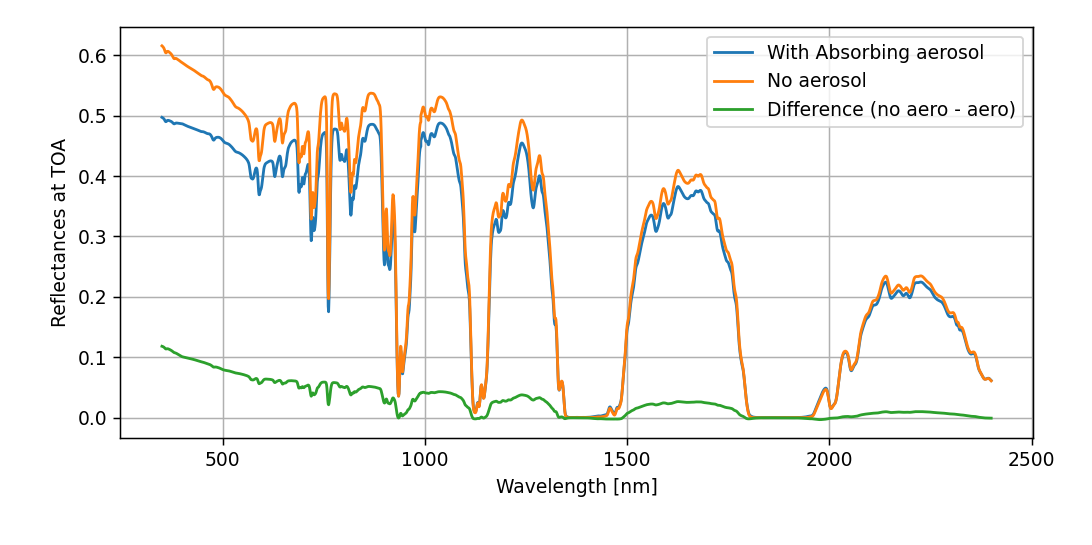

In [49]:
plt.figure(figsize=(6,3))
plt.plot(wvls,refl_a[:,2],label='With Absorbing aerosol')
plt.plot(wvls,refl_n[:,2],label='No aerosol')
plt.plot(wvls,refl_n[:,2]-refl_a[:,2],label='Difference (no aero - aero)')
plt.legend()
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectances at TOA')
plt.tight_layout()
plt.savefig(fo+'ORACLES_cloud_Reflectance_with_without_aero.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


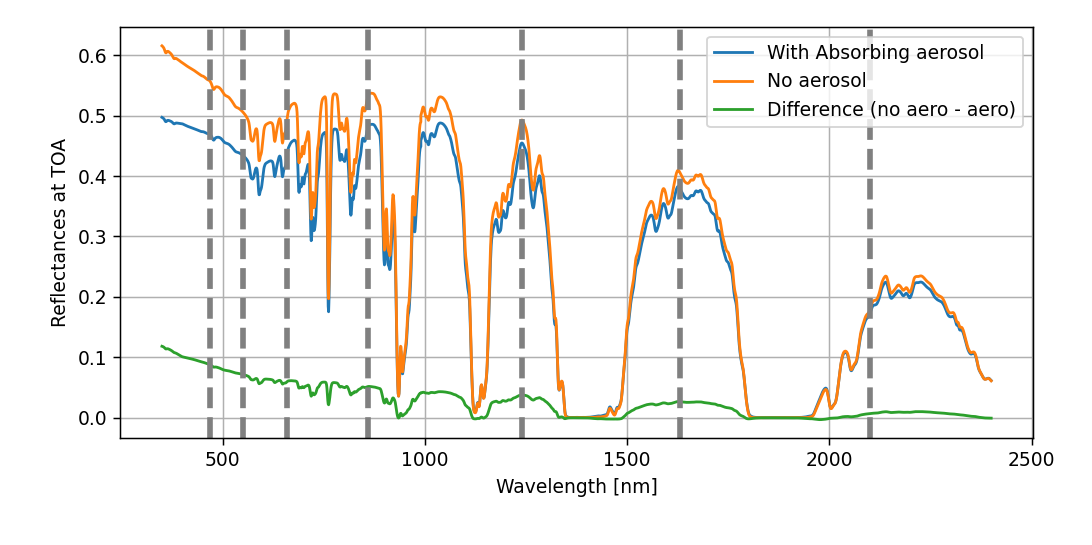

In [50]:
plt.figure(figsize=(6,3))
plt.plot(wvls,refl_a[:,2],label='With Absorbing aerosol')
plt.plot(wvls,refl_n[:,2],label='No aerosol')
plt.plot(wvls,refl_n[:,2]-refl_a[:,2],label='Difference (no aero - aero)')
plt.legend()
for x in [470,550,660,860,1240,1630,2100]:
    plt.axvline(x,color='grey',linestyle='--',lw=3)
plt.grid()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Reflectances at TOA')
plt.tight_layout()
plt.savefig(fo+'ORACLES_cloud_Reflectance_with_without_aero_lines.png',dpi=600,transparent=True)

In [51]:
fo

'/scratch/rtm/input/TASNPP_v1/'

# Load and plot the relative ACAOD spectra

In [7]:
ff = '/data/sam/ORACLES/'

In [8]:
a6 = hs.loadmat(ff+'ORACLES2016_4STAR_ACAOD_relative_to_550.mat')
a7 = hs.loadmat(ff+'ORACLES2017_4STAR_ACAOD_relative_to_550.mat')
a8 = hs.loadmat(ff+'ORACLES2018_4STAR_ACAOD_relative_to_550.mat')

In [9]:
a6.keys()

dict_keys(['AOD0470_rel', 'AOD0550_abs', 'AOD0675_rel', 'AOD0865_rel', 'AOD1236_rel', 'alt', 'details', 'doy', 'lat', 'lon'])

In [10]:
print(a6['details'])

b'\nThis is a combined product from all 4STAR 2016 ORACLES. The AOD are quality flagged, and only for the above cloud ACAOD. \nBased on the R3 ict files.\nAODXXXX_rel - represent the ratio of AOD of the wavelength XXXX (in nm) to the AOD 550 nm\nAOD0550_abs - the absolute value of AOD\nlon - Longitude\nlat - Latitude\nalt - GPS Altitude (meters)\ndoy - fractional day\n\nProduced by Samuel LeBlanc on 2022-02-04 15:59:51.907786\n'


In [11]:
wla = [470,550,675,865,1236]
a6['aod'] = np.vstack([a6['AOD0470_rel']*a6['AOD0550_abs'],a6['AOD0550_abs'],a6['AOD0675_rel']*a6['AOD0550_abs'],a6['AOD0865_rel']*a6['AOD0550_abs'],a6['AOD1236_rel']*a6['AOD0550_abs']])
a7['aod'] = np.vstack([a7['AOD0470_rel']*a7['AOD0550_abs'],a7['AOD0550_abs'],a7['AOD0675_rel']*a7['AOD0550_abs'],a7['AOD0865_rel']*a7['AOD0550_abs'],a7['AOD1236_rel']*a7['AOD0550_abs']])
a8['aod'] = np.vstack([a8['AOD0470_rel']*a8['AOD0550_abs'],a8['AOD0550_abs'],a8['AOD0675_rel']*a8['AOD0550_abs'],a8['AOD0865_rel']*a8['AOD0550_abs'],a8['AOD1236_rel']*a8['AOD0550_abs']])


In [12]:
a6['aod'].shape

(5, 41374)

<IPython.core.display.Javascript object>


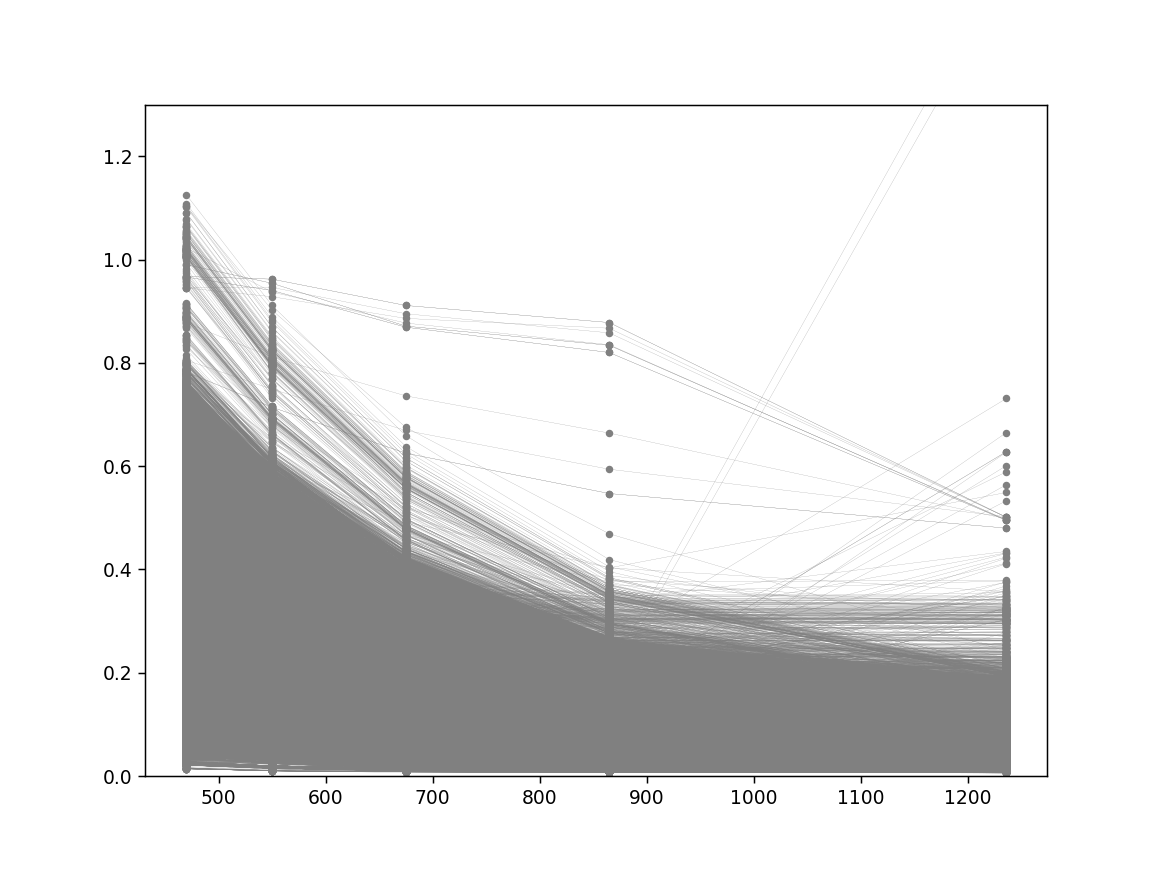

(0.0, 1.3)

In [71]:
plt.figure()
plt.plot(wla,a6['aod'],'.-',color='grey',lw=0.1)
plt.ylim(0,1.3)

In [13]:
aod6 = np.ma.masked_array(a6['aod'].T,np.isnan(a6['aod'].T))
aod7 = np.ma.masked_array(a7['aod'].T,np.isnan(a7['aod'].T))
aod8 = np.ma.masked_array(a8['aod'].T,np.isnan(a8['aod'].T))

In [16]:
aod6.shape

(41374, 5)

<IPython.core.display.Javascript object>


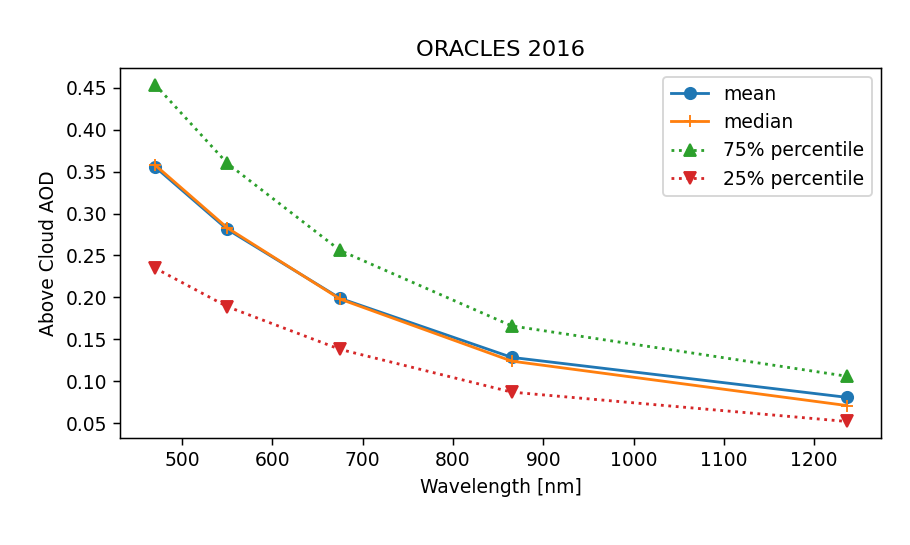

In [61]:
plt.figure(figsize=(5,3))
plt.plot(wla,np.nanmean(aod6,axis=0),'o-',label='mean')
plt.plot(wla,np.nanmedian(a6['aod'].T,axis=0),'+-',label='median')
plt.plot(wla,np.nanpercentile(a6['aod'].T,75,axis=0),'^:',label='75% percentile')
plt.plot(wla,np.nanpercentile(a6['aod'].T,25,axis=0),'v:',label='25% percentile')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Above Cloud AOD')
plt.title('ORACLES 2016')
plt.tight_layout()
plt.savefig(ff+'ORACLES_2016_acaod_avg_for_TASNPP.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


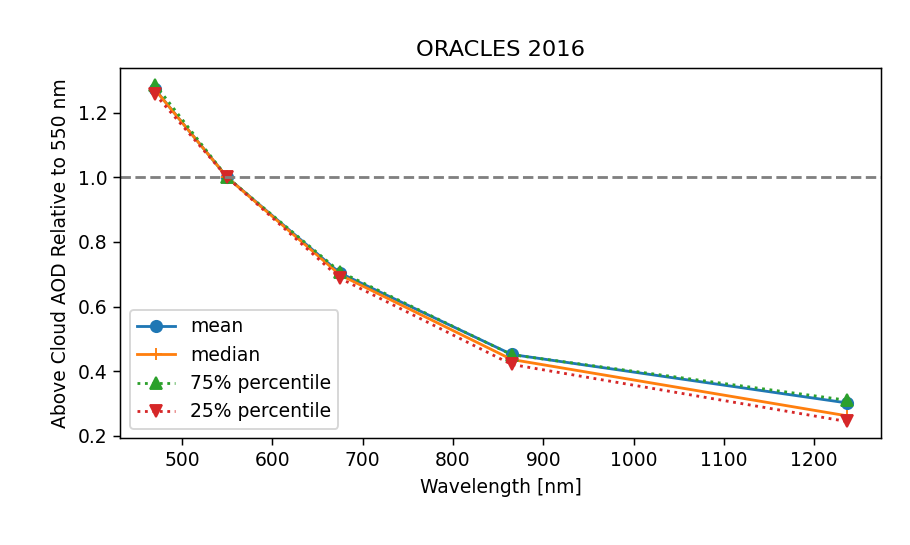

In [67]:
plt.figure(figsize=(5,3))
plt.plot(wla,np.nanmean(a6['aod']/a6['AOD0550_abs'],axis=1),'o-',label='mean')
plt.plot(wla,np.nanmedian(a6['aod']/a6['AOD0550_abs'],axis=1),'+-',label='median')
plt.plot(wla,np.nanpercentile(a6['aod']/a6['AOD0550_abs'],75,axis=1),'^:',label='75% percentile')
plt.plot(wla,np.nanpercentile(a6['aod']/a6['AOD0550_abs'],25,axis=1),'v:',label='25% percentile')
plt.axhline(1,ls='--',color='grey')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Above Cloud AOD Relative to 550 nm')
plt.title('ORACLES 2016')
plt.tight_layout()
plt.savefig(ff+'ORACLES_2016_acaod_avg_for_TASNPP_rel550.png',dpi=600,transparent=True)

In [80]:
qe_wv = [358.80689111129686,  434.3750056895338, 571.5909028841447, 804.2613372576161, 1046.8750739639393, 1233.8067545624858, 1683.2387765330593, 549.7159654690166]
qe = [0.1507455703364354,  0.12325255219252594, 0.09832245607751045, 0.0640726880950128, 0.047064292802888326, 0.0391425919799973, 0.027027020685372494, 0.10205032909070726]

In [81]:
qe_rel = np.array(qe)/np.array(qe[-1])
isort = np.argsort(qe_wv)
qe_wv = np.array(qe_wv)[isort]
qe_rel = qe_rel[isort]

<IPython.core.display.Javascript object>


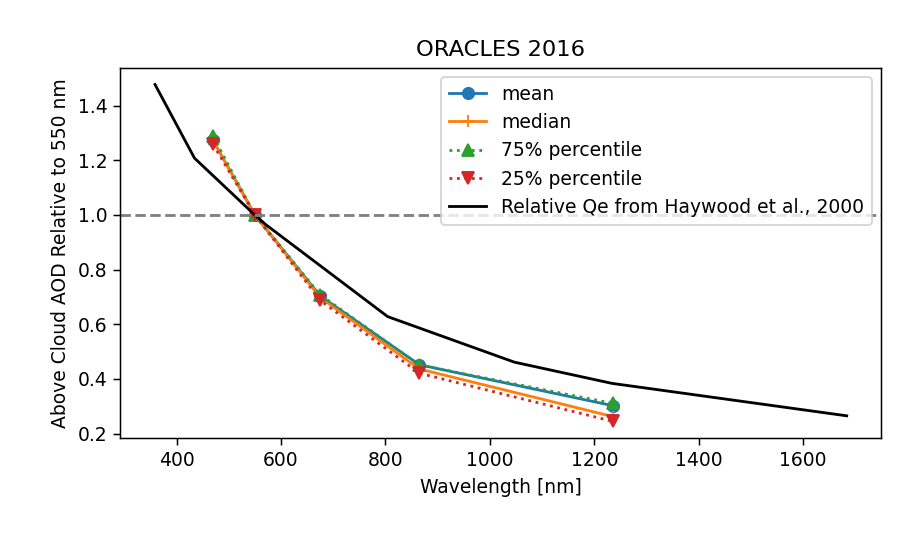

In [82]:
plt.figure(figsize=(5,3))
plt.plot(wla,np.nanmean(a6['aod']/a6['AOD0550_abs'],axis=1),'o-',label='mean')
plt.plot(wla,np.nanmedian(a6['aod']/a6['AOD0550_abs'],axis=1),'+-',label='median')
plt.plot(wla,np.nanpercentile(a6['aod']/a6['AOD0550_abs'],75,axis=1),'^:',label='75% percentile')
plt.plot(wla,np.nanpercentile(a6['aod']/a6['AOD0550_abs'],25,axis=1),'v:',label='25% percentile')
plt.plot(qe_wv,qe_rel,'-k',label='Relative Qe from Haywood et al., 2000')
plt.axhline(1,ls='--',color='grey')
plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Above Cloud AOD Relative to 550 nm')
plt.title('ORACLES 2016')
plt.tight_layout()
plt.savefig(ff+'ORACLES_2016_acaod_avg_for_TASNPP_rel550_haywood.png',dpi=600,transparent=True)